In [1]:
import pandas as pd

# Read CSV file
df = pd.read_csv('/content/College_Event_Feedback.csv')

# Display first few rows
df.head()


,Student_ID,Event_Name,Rating,Feedback_Comment
0,S101,TechFest,5,The event was good but could improve timing.
1,S102,Workshop,1,"Sound system was poor, but overall experience ..."
2,S103,Cultural Night,4,The event was very well organized and fun!
3,S104,Sports Meet,5,"Loved every bit, looking forward to next year!"
4,S105,Orientation,1,"Excellent organization, volunteers were helpful."


In [2]:
# Check basic info
df.info()

# Summary of numeric columns
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Student_ID        50 non-null     object
 1   Event_Name        50 non-null     object
 2   Rating            50 non-null     int64 
 3   Feedback_Comment  50 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


,Rating
count,50.00000
mean,2.88000
std,1.56022
min,1.00000
25%,1.00000
50%,3.00000
75%,4.00000
max,5.00000


In [3]:
# Remove any blank spaces and missing values
df['Feedback_Comment'] = df['Feedback_Comment'].astype(str).str.strip()
df.dropna(inplace=True)


In [4]:
!pip install textblob
from textblob import TextBlob

# Get polarity (sentiment score)
df['Polarity'] = df['Feedback_Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment
def get_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(get_sentiment)

# Preview
df[['Event_Name', 'Rating', 'Feedback_Comment', 'Sentiment']].head()


,Event_Name,Rating,Feedback_Comment,Sentiment
0,TechFest,5,The event was good but could improve timing.,Positive
1,Workshop,1,"Sound system was poor, but overall experience ...",Positive
2,Cultural Night,4,The event was very well organized and fun!,Positive
3,Sports Meet,5,"Loved every bit, looking forward to next year!",Positive
4,Orientation,1,"Excellent organization, volunteers were helpful.",Positive


/tmp/ipython-input-1431539444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


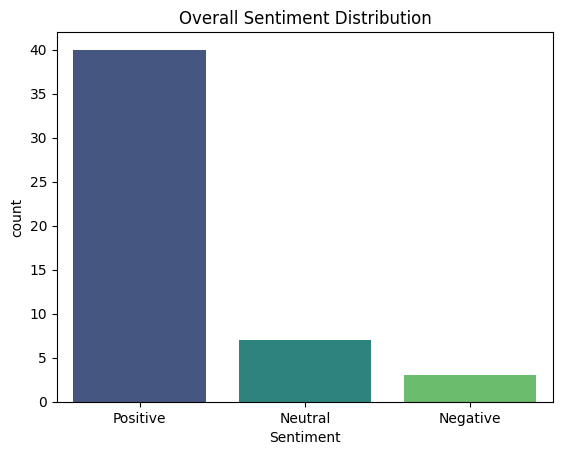

/tmp/ipython-input-1431539444.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Event_Name', y='Rating', palette='coolwarm')


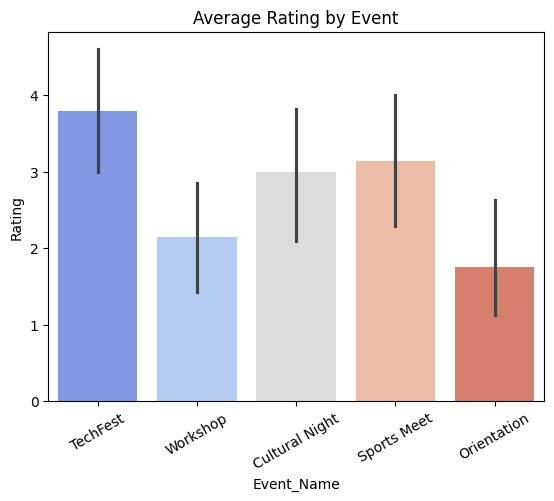

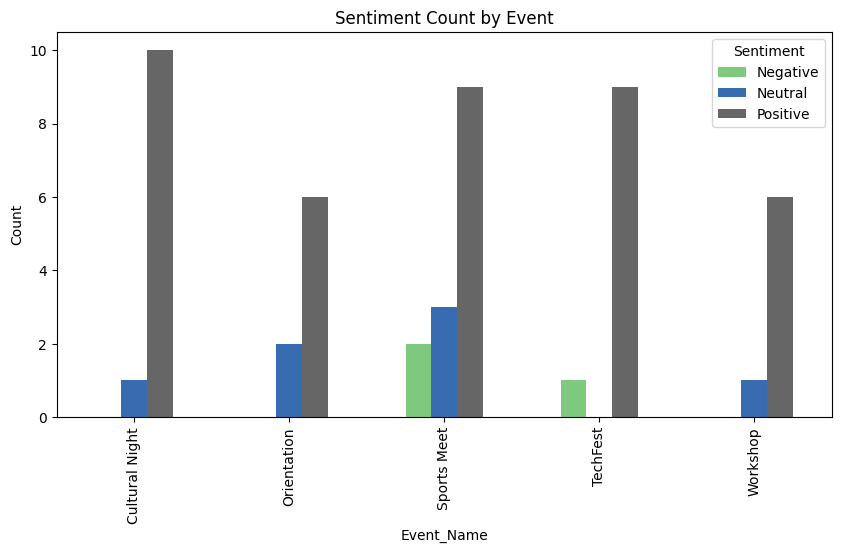

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment count
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.show()

# Average rating by event
sns.barplot(data=df, x='Event_Name', y='Rating', palette='coolwarm')
plt.title('Average Rating by Event')
plt.xticks(rotation=30)
plt.show()

# Sentiment by Event
sentiment_event = pd.crosstab(df['Event_Name'], df['Sentiment'])
sentiment_event.plot(kind='bar', figsize=(10,5), colormap='Accent')
plt.title('Sentiment Count by Event')
plt.ylabel('Count')
plt.show()
